<a href="https://colab.research.google.com/github/youngyoung-0/colab-notebook/blob/main/series_of_studying_by_myself/hanbit_market_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np

# prepare data
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

# transformer skelarn
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

print(poly.get_feature_names_out())


(42, 9)
['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2']


In [2]:
# training linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 0.9903183436982125
print(lr.score(test_poly, test_target)) # 0.9714559911594111


# When the degree of the polynomial features is 5, the model is almost perfectly correct on the traing score, but the test score is negative.
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 0.9999999999996433
print(lr.score(test_poly, test_target)) # -144.40579436844948

0.9903183436982125
0.9714559911594111
0.9999999999996433
-144.40579436844948


In [3]:
# calcucate standard score
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# regularization
# ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


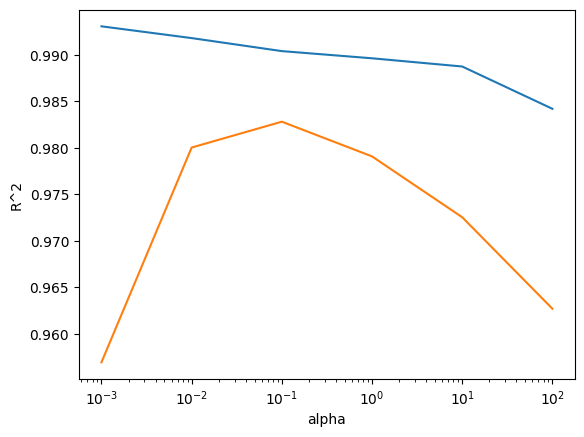

In [4]:
# find appropriate regulations
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # make ridge
  ridge = Ridge(alpha = alpha)

  # training ridge
  ridge.fit(train_scaled, train_target)

  # save train_score and test_score
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list,train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


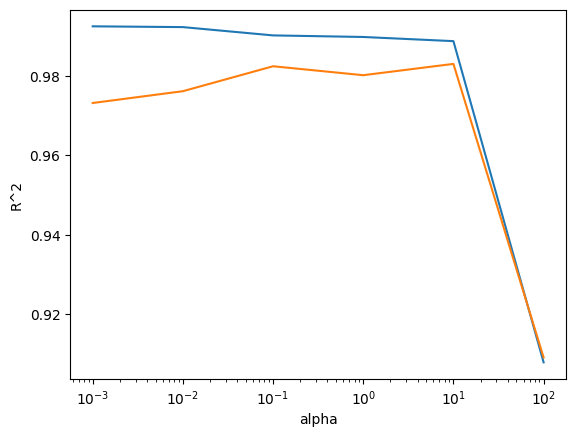

0.9888067471131867
0.9824470598706695


In [5]:
# lasso
from sklearn.linear_model import Lasso
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # make lasso model
  lasso = Lasso(alpha = alpha, max_iter=10000)
  # training lasso model
  lasso.fit(train_scaled, train_target)
  # save train_score and test_score
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


#
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
